<a href="https://colab.research.google.com/github/onism/MyLearning/blob/master/Keras_Y_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

img_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, img_size, img_size, 1])
x_test = np.reshape(x_test, [-1, img_size, img_size, 1])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
input_shape = (img_size, img_size,1)
batch_size = 32
kernel_size = 32
dropout = 0.4
n_filters = 32


left_inputs = Input(shape=input_shape)
x = left_inputs
filters = n_filters
for i in range(3):
    x = Conv2D(filters = filters, kernel_size=kernel_size, padding='same', activation='relu')(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
    filters *= 2

right_inputs = Input(shape=input_shape)
y = right_inputs
filters = n_filters
for i in range(3):
    y = Conv2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu', dilation_rate=2)(y)
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filters *= 2 

xy = concatenate([x,y])
xy = Flatten()(xy)
xy = Dropout(dropout)(xy)
outputs = Dense(num_labels, activation='softmax')(xy)
model = Model([left_inputs, right_inputs], outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   32800       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 32)   32800       input_2[0][0]                    
______________________________________________________________________________________________

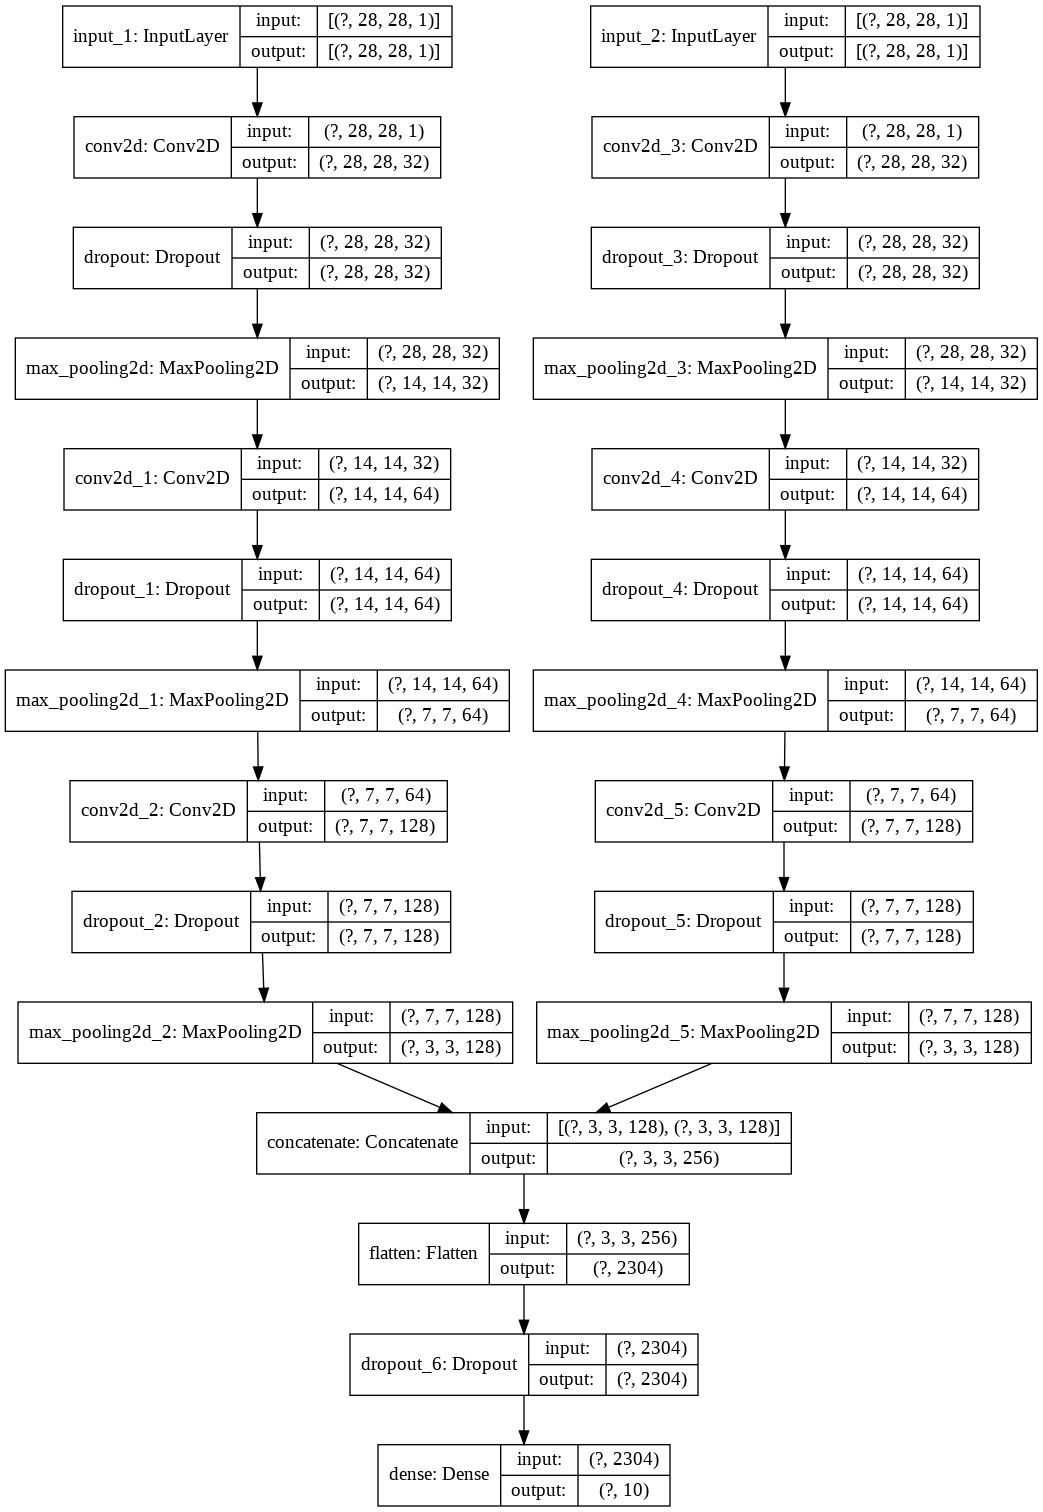

In [4]:
plot_model(model, to_file='y_model.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit([x_train, x_train], y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
 255/1875 [===>..........................] - ETA: 8:42 - loss: 0.6538 - accuracy: 0.7789

In [ ]:
score = model.evaluate([x_test, x_test], y_test, batch_size=batch_size)